In [1]:
# generate random objects of different signal absorption rate
# generate random lines between points outside of these objects (use border)
# draw lines between random lines based on the average signal absorption along the line

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
length = 100
min_size = 3
max_size = 20
min_absorption = 3
max_absorption = 20
n_objs = 100
n_lines = 70000

class Object:
    def __init__(self):
        self.x = random.randint(0, length)
        self.y = random.randint(0, length)
        self.size = random.randint(min_size, max_size)
        self.absorption = random.randint(min_absorption, max_absorption)

def get_pos(border, pos):
    if border == 0:
        return pos, 0
    if border == 1:
        return length-1, pos
    if border == 2:
        return pos, length-1
    return 0, pos
    
class Line:
    def __init__(self):
        borders = random.sample(range(-1, 3), 2)
        pos = (random.randint(0, length-1), random.randint(0, length-1))
        x0, y0 = get_pos(borders[0], pos[0])
        x1, y1 = get_pos(borders[1], pos[1])
        self.length = int(np.hypot(x1-x0, y1-y0))
        self.x, self.y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

In [4]:
random_objs = [Object() for i in range(n_objs)]
random_lines = [Line() for i in range(n_lines)]

In [5]:
gt = np.zeros(shape=(length, length), dtype=int)
for obj in random_objs:
    gt[obj.x:obj.x+obj.size, obj.y:obj.y+obj.size] = obj.absorption

In [6]:
def accumulate_lines(percentage_lines):
    res = np.zeros(shape=(length, length), dtype=float)
    counts = np.zeros(shape=(length, length), dtype=float)
    num_lines = int((len(random_lines)/100.)*float(percentage_lines))
    for line in random_lines[:num_lines]:
        values = gt[line.x.astype(int), line.y.astype(int)]
        res[line.x.astype(int), line.y.astype(int)] += np.average(values)
        counts[line.x.astype(int), line.y.astype(int)] += 1

    res[counts > 0] = res[counts > 0] / counts[counts > 0]
    return res

res100 = accumulate_lines(100)
res80 = accumulate_lines(80)
res60 = accumulate_lines(60)
res50 = accumulate_lines(50)
res40 = accumulate_lines(40)
res30 = accumulate_lines(30)
res20 = accumulate_lines(20)
res10 = accumulate_lines(10)
res05 = accumulate_lines(5)
res02 = accumulate_lines(2)

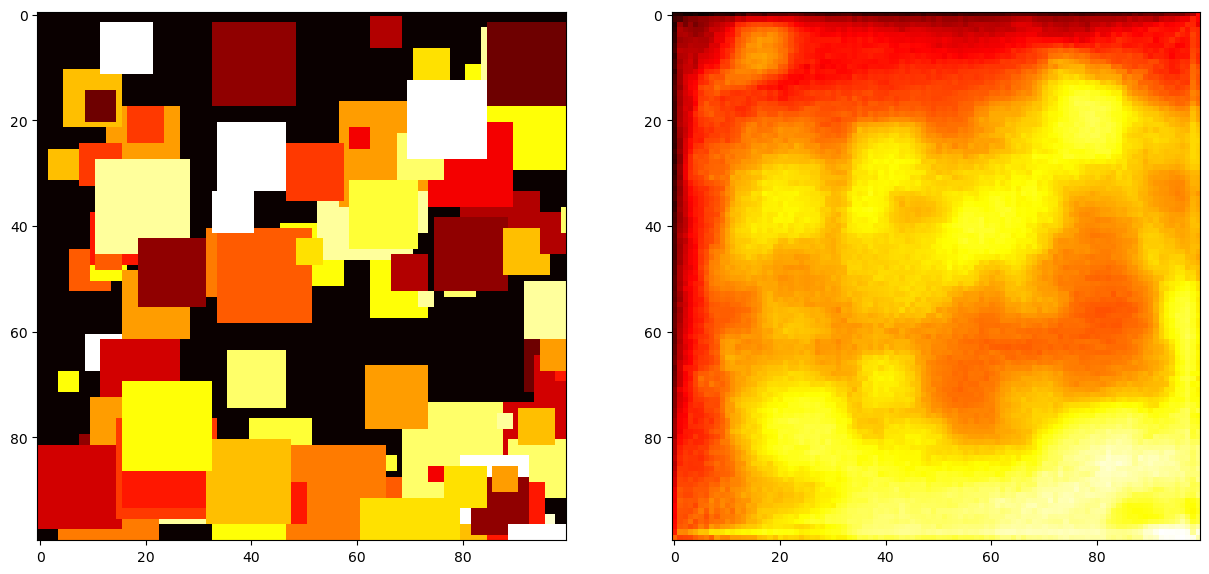

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 15))
im0 = axes[0].imshow(gt, cmap='hot')
im1 = axes[1].imshow(res100, cmap='hot')
plt.show()

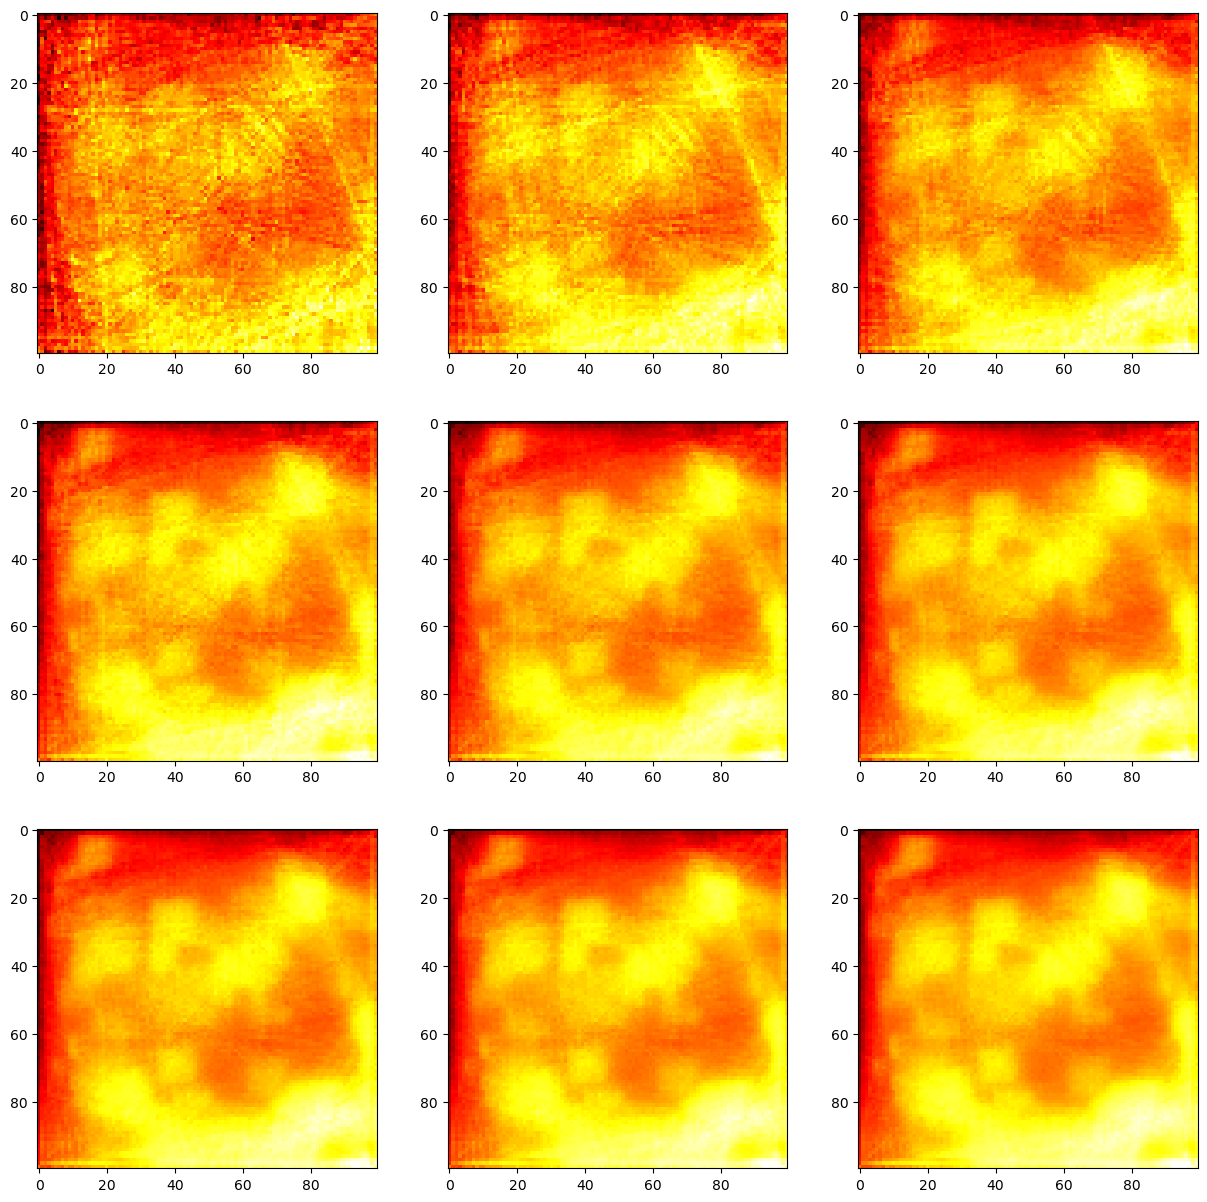

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes[0, 0].imshow(res02, cmap='hot')
axes[0, 1].imshow(res05, cmap='hot')
axes[0, 2].imshow(res10, cmap='hot')
axes[1, 0].imshow(res20, cmap='hot')
axes[1, 1].imshow(res30, cmap='hot')
axes[1, 2].imshow(res40, cmap='hot')
axes[2, 0].imshow(res50, cmap='hot')
axes[2, 1].imshow(res60, cmap='hot')
axes[2, 2].imshow(res80, cmap='hot')
plt.show()